# Pokemon - Data Project

In [1]:
# Import the libraries you will use for:

# data storage, orientation, and manipulation [i.e. standard numpy and pandas imports]
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# standard plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#standard stats library
from scipy import stats

# command for showing plot in jupyter notebooks
%matplotlib inline

In [2]:
# Importing data for analysis and visualization:

# make sure 'Pokemon.csv' is in this projects local file path

# import data into pandas df
df_pokemon = pd.read_csv('Pokemon.csv')

In [3]:
#view data to get a look at what columns and information we have to work with

#get the top 10 rows of data
df_pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [7]:
#use .info() on df to get a sense of what informaiton we might be missing in our dataset
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #          151 non-null    int64 
 1   Name       151 non-null    object
 2   Type 1     151 non-null    object
 3   Type 2     67 non-null     object
 4   Total      151 non-null    int64 
 5   HP         151 non-null    int64 
 6   Attack     151 non-null    int64 
 7   Defense    151 non-null    int64 
 8   Sp. Atk    151 non-null    int64 
 9   Sp. Def    151 non-null    int64 
 10  Speed      151 non-null    int64 
 11  Stage      151 non-null    int64 
 12  Legendary  151 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 14.4+ KB


Notes on ambinguous columns:

    - N/A in this situation because of previous Pokemon knowledge.

Data the we might be missing:

    - Based on info of df, it looks like we are missing a lot of Type 2 information. BUT based on knowledge of pokemon I know that not every pokemon has 2 types, therefore, this missing data note can largely be ignored.

#### QUESTIONS

Always remember, all good data analysis projects begins with trying to answer questions. Now that we know what column category data we have, think of some questions or insights we would like to obtain from the data.

First some basic questions:

    1.) What kind of pokemon are on this list? [Type, Stats (Att, Defense etc..), Stage etc.] [i.e. overview]
    2.) What are the top 5 - 10 pokemon in the following categories:
        1.) Total Stats
        2.) HP
        3.) Attack
        4.) Defense
        5.) Special Attack
        6.) Special Defense
        7.) Speed
    3.) Do the legendary pokemon fall into the top 10s? [Observation Question based on Q2]
    4.) What are the top 5 pokemon of each type based on tot. stats?
    5.) Does type dictate how good a pokemon is?/Is there a correlation between power and type?
    
Then it makes sense to dig deeper, with a broader open-ended question:

    6.) What factors would lead to a good party of pokemon [i.e. 6 pokemon]? Does best total stats make the best party based on your previous knowledge of pokemon?

#### Analysis & Visualization

1.) What kind of pokemon are on this list? [Type, Stats (Att, Defense etc..), Stage etc.] [i.e. overview]

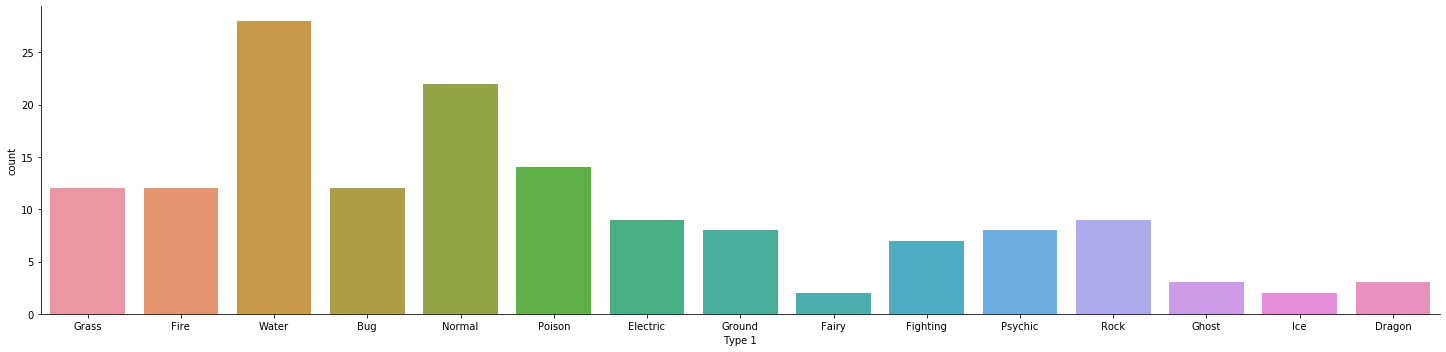

In [13]:
# Create a catplot x = type v. y = count of type
sns.catplot(data = df_pokemon, x = 'Type 1', kind = 'count', aspect = 4)

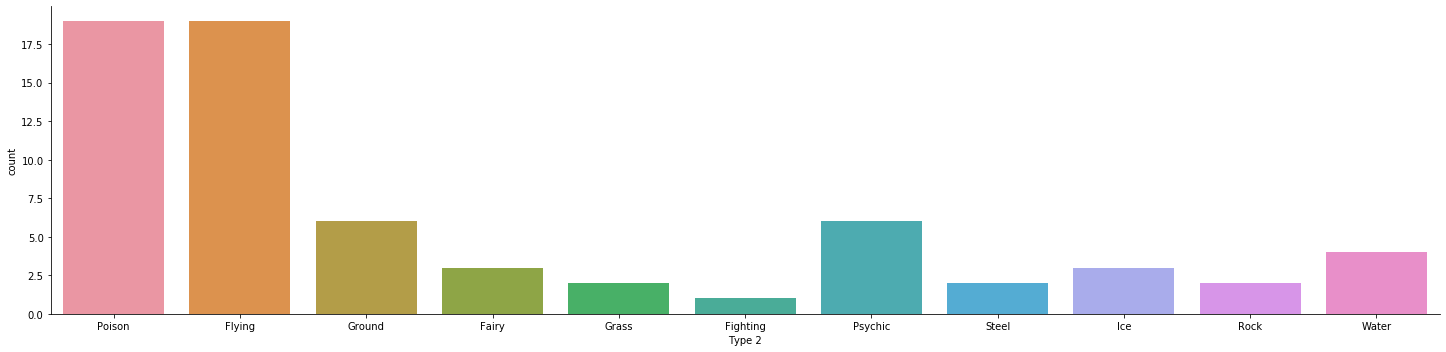

In [15]:
# Create a catplot x = second type v. y = count of type
sns.catplot(data = df_pokemon, x = 'Type 2', kind = 'count', aspect = 4)

OBSERVATION 1.1.1 - The Types seem to fall into 4 teirs in terms of quantity. Water and Normal are the most predominant Pokemon Types, (grass, fire, bug, and posion) fall into the second teir, (electric, ground, fighting, psychic, and rock) fall into the third tier, and (fairy, ghost, ice, dragon) fall into the fourth tier.

Additionally, it looks like the Type 2 types are perdominated by poison and flying, AND the secondary types are don't necessarily derive from the primary types.

In [1]:
# For the next 7 plots, create distributions of the different stats of the pokemon:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CB26B4BC8>]],
      dtype=object)

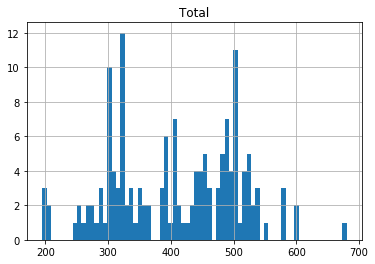

In [19]:
# Create a catplot that shows the distribution of tot. stats amoung pokemon
df_pokemon.hist('Total', bins = 70)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D64C7DCD08>]],
      dtype=object)

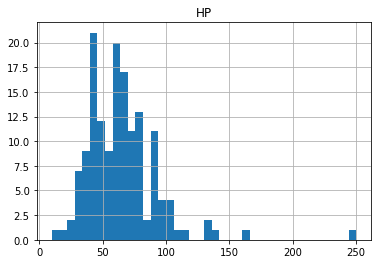

In [11]:
# Create a catplot that shows the distribution of HP stats amoung pokemon
df_pokemon.hist('HP', bins = 40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D64F6C2648>]],
      dtype=object)

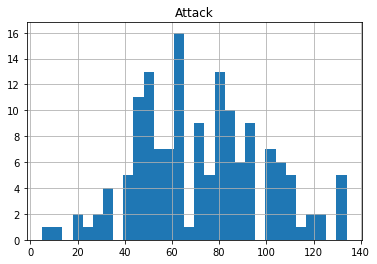

In [23]:
# Create a catplot that shows the distribution of Attack stats amoung pokemon
df_pokemon.hist('Attack', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D64F731D48>]],
      dtype=object)

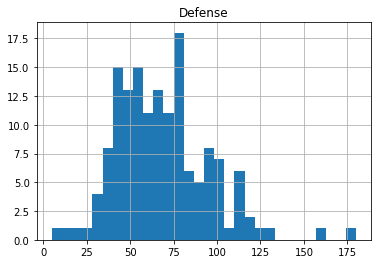

In [22]:
# Create a catplot that shows the distribution of Defense stats amoung pokemon
df_pokemon.hist('Defense', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D64CDF1A88>]],
      dtype=object)

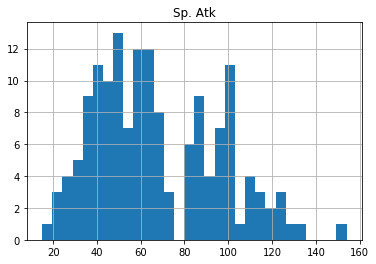

In [21]:
# Create a catplot that shows the distribution of Sp.Atk stats amoung pokemon
df_pokemon.hist('Sp. Atk', bins = 30)

NOTE - there is a space after the . in Sp. Atk and Sp. Def

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D64F4F2A88>]],
      dtype=object)

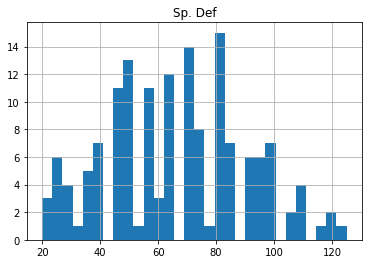

In [24]:
# Create a catplot that shows the distribution of Sp. Def stats amoung pokemon
df_pokemon.hist('Sp. Def', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D64FC27D08>]],
      dtype=object)

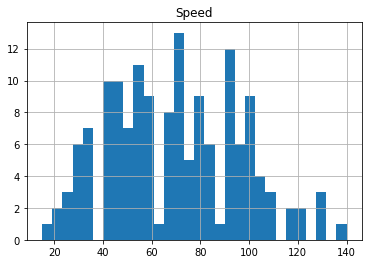

In [25]:
# Create a catplot that shows the distribution of Speed stats amoung pokemon
df_pokemon.hist('Speed', bins = 30)

OBSERVATION 1.1.2 - Is there anything that we can observe from the distribution of stats:

    - Tot. Stats: In general, total stats look like they follow a binomial distribution with a cluster in the middle. With spikes centered around 325, 400, and 500. My initial thought, based on previous pokemon knowledge, is that these spikes will correspond to the different stages off pokemon. [i.e. the higher the tot stats, will correlate to higher stage pokemon IF they have evolve forms]
    - HP: looks like the bulk of pokemon's HP falls between 40 and 75, with a couple of big outliers about the 100 HP mark. MY ASSUMPTION is that these pokemon are legendaries or very tanky pokemon like snorlax
    - Attack: looks to be more normally distributed around 60 Attack, with less high end outliers.
    - Defense: distribution skewed a little more to the left, looking similar to the HP distrubtion.
    - Sp. Atk: slightly skewed, to the left, distribution. Centered around 60 while having a few dramatic outliers.
    - Sp. Def: more normally distributed. 
    - Speed: more normally distributed.
    
Overall, the detail in the above observation is largely unecessary as the histograms allow us to see this. The only real insight is the fact that the tot. stats distribution probably follows the evolution claim.

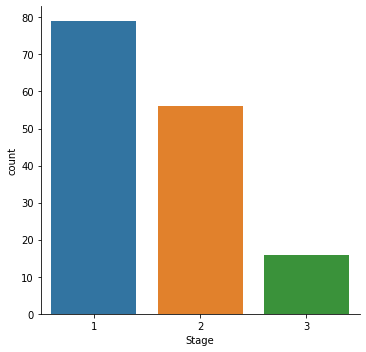

In [28]:
# Create a catplot x = Stage v. y = count
sns.catplot(data = df_pokemon, x = 'Stage', kind = 'count')

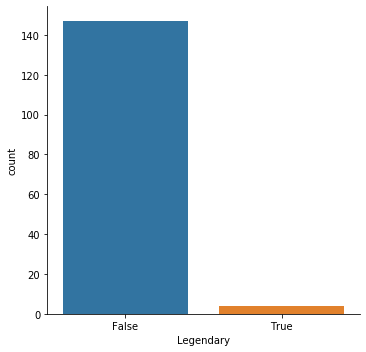

In [29]:
# Create a catplot x = Legendary v. y = count
sns.catplot(data = df_pokemon, x = "Legendary", kind = 'count')

In [33]:
# Not enough Legendaries to make a graph make sense, get a count.
df_pokemon['Legendary'].value_counts()

False    147
True       4
Name: Legendary, dtype: int64

    2.) What are the top 5 - 10 pokemon in the following categories:
        1.) Total Stats
        2.) HP
        3.) Attack
        4.) Defense
        5.) Special Attack
        6.) Special Defense
        7.) Speed

In [41]:
# Sort the stats from highest to lowests and show the top 10.
df_pokemon.sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
150,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
144,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
58,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,2,False
142,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
129,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,2,False
130,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False


In [42]:
df_pokemon.sort_values(by = 'HP', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
112,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
142,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
39,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,2,False
130,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
133,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,2,False
38,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
88,89,Muk,Poison,NaN,500,105,105,75,65,100,50,2,False
111,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,2,False
114,115,Kangaskhan,Normal,NaN,490,105,95,80,40,80,90,1,False


In [43]:
df_pokemon.sort_values(by = 'Attack', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
111,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,2,False
135,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,2,False
67,68,Machamp,Fighting,NaN,505,90,130,80,65,85,55,3,False
98,99,Kingler,Water,NaN,475,55,130,115,50,50,75,2,False
126,127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False
129,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,2,False
105,106,Hitmonlee,Fighting,NaN,455,50,120,53,35,110,87,1,False
75,76,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False
140,141,Kabutops,Rock,Water,495,60,115,105,65,70,80,2,False


In [46]:
df_pokemon.sort_values(by = 'Defense', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
90,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,2,False
94,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False
75,76,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False
138,139,Omastar,Rock,Water,495,70,60,125,115,70,55,2,False
111,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,2,False
109,110,Weezing,Poison,NaN,490,65,90,120,85,70,60,2,False
113,114,Tangela,Grass,NaN,435,65,55,115,100,40,60,1,False
98,99,Kingler,Water,NaN,475,55,130,115,50,50,75,2,False
74,75,Graveler,Rock,Ground,390,55,95,115,45,45,35,2,False
27,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,2,False


In [44]:
df_pokemon.sort_values(by = 'Sp. Atk', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
64,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,3,False
93,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,3,False
102,103,Exeggutor,Grass,Psychic,520,95,95,85,125,65,55,2,False
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
144,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
63,64,Kadabra,Psychic,NaN,400,40,35,30,120,70,105,2,False
81,82,Magneton,Electric,Steel,465,50,60,95,120,70,70,2,False
123,124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False
92,93,Haunter,Ghost,Poison,405,45,50,45,115,55,95,2,False


In [45]:
df_pokemon.sort_values(by = 'Sp. Def', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
121,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False
72,73,Tentacruel,Water,Poison,515,80,70,65,80,120,100,2,False
96,97,Hypno,Psychic,NaN,483,85,73,70,73,115,67,2,False
135,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,2,False
142,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
106,107,Hitmonchan,Fighting,NaN,455,50,105,79,35,110,76,1,False
105,106,Hitmonlee,Fighting,NaN,455,50,120,53,35,110,87,1,False
112,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False


In [47]:
df_pokemon.sort_values(by = 'Speed', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
100,101,Electrode,Electric,NaN,480,60,50,70,80,80,140,2,False
141,142,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False
134,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,2,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
64,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,3,False
50,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,2,False
120,121,Starmie,Water,Psychic,520,60,75,85,100,85,115,2,False
52,53,Persian,Normal,NaN,440,65,70,60,65,65,115,2,False
127,128,Tauros,Normal,NaN,490,75,100,95,40,70,110,1,False
25,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,2,False


3.) Do the legendary pokemon fall into the top 10s? [Observation Question based on Q2]

Essentially, OBSERVATION 2.1 -

    - For the total stats column, all 4 legendaries fall within the top ten.
    - For Attack, and Defense no legendary pokemon fall within the top ten. Which makes sense because Special stats are correlated to Type. Specifically, fire, water, grass, electric, psychic, and ice moves.

4.) What are the top 5 pokemon of each type based on tot. stats?

In [10]:
# Top 5 Water Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Water'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
129,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,2,False
130,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
133,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,2,False
90,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,2,False
120,121,Starmie,Water,Psychic,520,60,75,85,100,85,115,2,False
72,73,Tentacruel,Water,Poison,515,80,70,65,80,120,100,2,False
61,62,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,3,False
54,55,Golduck,Water,NaN,500,80,82,78,95,80,85,2,False
79,80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,2,False


In [13]:
# Top 5 Grass Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Grass'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
102,103,Exeggutor,Grass,Psychic,520,95,95,85,125,65,55,2,False
44,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,3,False
70,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,3,False
113,114,Tangela,Grass,NaN,435,65,55,115,100,40,60,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
43,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,2,False
69,70,Weepinbell,Grass,Poison,390,65,90,50,85,45,55,2,False
101,102,Exeggcute,Grass,Psychic,325,60,40,80,60,45,40,1,False
42,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


In [14]:
# Top 5 Fire Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Fire'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
58,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,2,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
135,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,2,False
37,38,Ninetales,Fire,NaN,505,73,76,75,81,100,100,2,False
77,78,Rapidash,Fire,NaN,500,65,100,70,80,80,105,2,False
125,126,Magmar,Fire,NaN,495,65,95,57,100,85,93,1,False
76,77,Ponyta,Fire,NaN,410,50,85,55,65,65,90,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
57,58,Growlithe,Fire,NaN,350,55,70,45,70,50,60,1,False


In [15]:
# Top 5 Bug Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Bug'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
122,123,Scyther,Bug,Flying,500,70,110,80,55,80,105,1,False
126,127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False
48,49,Venomoth,Bug,Poison,450,70,65,60,90,75,90,2,False
46,47,Parasect,Bug,Grass,405,60,95,80,60,80,30,2,False
11,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,3,False
14,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,3,False
47,48,Venonat,Bug,Poison,305,60,55,50,40,55,45,1,False
45,46,Paras,Bug,Grass,285,35,70,55,45,55,25,1,False
10,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,2,False
13,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,2,False


In [17]:
# Top 5 Normal Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Normal'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
142,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
127,128,Tauros,Normal,NaN,490,75,100,95,40,70,110,1,False
114,115,Kangaskhan,Normal,NaN,490,105,95,80,40,80,90,1,False
17,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,3,False
84,85,Dodrio,Normal,Flying,460,60,110,70,60,60,100,2,False
112,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
21,22,Fearow,Normal,Flying,442,65,90,65,61,61,100,2,False
52,53,Persian,Normal,NaN,440,65,70,60,65,65,115,2,False
39,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,2,False
19,20,Raticate,Normal,NaN,413,55,81,60,50,70,97,2,False


In [18]:
# Top 5 Poison Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Poison'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
30,31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76,3,False
33,34,Nidoking,Poison,Ground,505,81,102,77,85,75,85,3,False
88,89,Muk,Poison,NaN,500,105,105,75,65,100,50,2,False
109,110,Weezing,Poison,NaN,490,65,90,120,85,70,60,2,False
41,42,Golbat,Poison,Flying,455,75,80,70,65,75,90,2,False
23,24,Arbok,Poison,NaN,438,60,85,69,65,79,80,2,False
29,30,Nidorina,Poison,NaN,365,70,62,67,55,55,56,2,False
32,33,Nidorino,Poison,NaN,365,61,72,57,55,55,65,2,False
108,109,Koffing,Poison,NaN,340,40,65,95,60,45,35,1,False
87,88,Grimer,Poison,NaN,325,80,80,50,40,50,25,1,False


In [19]:
# Top 5 Electric Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Electric'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
144,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
134,135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,2,False
124,125,Electabuzz,Electric,NaN,490,65,83,57,95,85,105,1,False
25,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,2,False
100,101,Electrode,Electric,NaN,480,60,50,70,80,80,140,2,False
81,82,Magneton,Electric,Steel,465,50,60,95,120,70,70,2,False
99,100,Voltorb,Electric,NaN,330,40,30,50,55,55,100,1,False
80,81,Magnemite,Electric,Steel,325,25,35,70,95,55,45,1,False
24,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


In [21]:
# Top 5 Ground Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Ground'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
111,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,2,False
27,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,2,False
104,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,2,False
50,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,2,False
110,111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False
103,104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False
26,27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
49,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False


In [22]:
# Top 5 Fairy Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Fairy'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
35,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,2,False
34,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35,1,False


In [23]:
# Top 5 Fighting Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Fighting'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
67,68,Machamp,Fighting,NaN,505,90,130,80,65,85,55,3,False
56,57,Primeape,Fighting,NaN,455,65,105,60,60,70,95,2,False
105,106,Hitmonlee,Fighting,NaN,455,50,120,53,35,110,87,1,False
106,107,Hitmonchan,Fighting,NaN,455,50,105,79,35,110,76,1,False
66,67,Machoke,Fighting,NaN,405,80,100,70,50,60,45,2,False
55,56,Mankey,Fighting,NaN,305,40,80,35,35,45,70,1,False
65,66,Machop,Fighting,NaN,305,70,80,50,35,35,35,1,False


In [25]:
# Top 5 Psychic Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Psychic'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
150,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False
64,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,3,False
96,97,Hypno,Psychic,NaN,483,85,73,70,73,115,67,2,False
121,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False
63,64,Kadabra,Psychic,NaN,400,40,35,30,120,70,105,2,False
95,96,Drowzee,Psychic,NaN,328,60,48,45,43,90,42,1,False
62,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False


In [26]:
# Top 5 Rock Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Rock'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
141,142,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False
75,76,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False
138,139,Omastar,Rock,Water,495,70,60,125,115,70,55,2,False
140,141,Kabutops,Rock,Water,495,60,115,105,65,70,80,2,False
74,75,Graveler,Rock,Ground,390,55,95,115,45,45,35,2,False
94,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False
137,138,Omanyte,Rock,Water,355,35,40,100,90,55,35,1,False
139,140,Kabuto,Rock,Water,355,30,80,90,55,45,55,1,False
73,74,Geodude,Rock,Ground,300,40,80,100,30,30,20,1,False


In [27]:
# Top 5 Ghost Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Ghost'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
93,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,3,False
92,93,Haunter,Ghost,Poison,405,45,50,45,115,55,95,2,False
91,92,Gastly,Ghost,Poison,310,30,35,30,100,35,80,1,False


In [29]:
# Top 5 Ice Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Ice'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
123,124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False


In [30]:
# Top 5 Dragon Pokemon
df_pokemon[df_pokemon['Type 1'] == 'Dragon'].sort_values(by = 'Total', ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False


5.) Does type dictate how good a pokemon is?/Is there a correlation between power and type?

This question is not as good as I initially thought. You can essentially look at the the ranking of pokemon of each type, in the above tables, to get a understanding of which types are stronger. With that said, it would be good practice to try and stick this information on a lmplot, to get a feel which type has the most amount of strong pokemon.

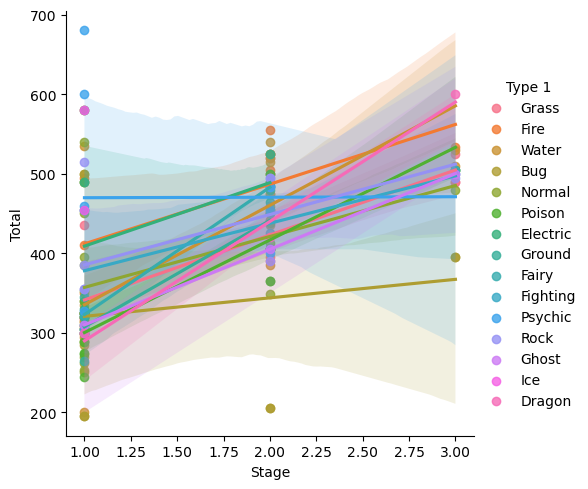

In [9]:
# lmplot x = total stats vs. y = quantity with the hue = type
sns.lmplot(data = df_pokemon, x = 'Stage', y = 'Total', hue = 'Type 1')

OBSERVATION 5.1 - I believe my though above stands. With the way the data is, there aren't many variables that we can correlate. Therefore, the above is merely a practice.

6.) What factors would lead to a good party of pokemon [i.e. 6 pokemon]? Does best total stats make the best party based on your previous knowledge of pokemon?

[OPEN-ENDED QUESTION]

Based on previous knowledge of Pokemon, there are a lot of different factors that contribute to a good party. Some are as follows:
    
    - The party you are facing. [i.e. if you have all good water pokemon, but you opponent has an electrice type pokemon. Then you will probably lose.]
    - If you choose to use legendary pokemon. [i.e. Mewtwo is by far the best pokemon in the game, and would therefore make everyones parties.]
    - Movesets. Different moves, and different parties you face will have an impact of the perceived value of a party.
    
Therefore, I think the best we can do is to plot a correlation between TOT Power, and the sum of weakness type stats. This will at least give us a gauge on if the strongest Pokemon will, more often than not, be strong against a random opponent.

Finally, I think the better way to tackle this question would be to do a full simulation of parties, BUT that is out of the scope of the dataset.

In [4]:
df_weakness = pd.read_csv('chart.csv')

In [5]:
df_weakness

,Attacking,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
1,Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
2,Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
3,Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
4,Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
5,Ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
6,Fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
7,Poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
8,Ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
9,Flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


In [40]:
type_ser = df_weakness.to_dict()

In [41]:
type_ser

{'Attacking': {0: 'Normal',
  1: 'Fire',
  2: 'Water',
  3: 'Electric',
  4: 'Grass',
  5: 'Ice',
  6: 'Fighting',
  7: 'Poison',
  8: 'Ground',
  9: 'Flying',
  10: 'Psychic',
  11: 'Bug',
  12: 'Rock',
  13: 'Ghost',
  14: 'Dragon',
  15: 'Dark',
  16: 'Steel',
  17: 'Fairy'},
 'Normal': {0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 2,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 0,
  14: 1,
  15: 1,
  16: 1,
  17: 1},
 'Fire': {0: 1.0,
  1: 0.5,
  2: 2.0,
  3: 1.0,
  4: 0.5,
  5: 0.5,
  6: 1.0,
  7: 1.0,
  8: 2.0,
  9: 1.0,
  10: 1.0,
  11: 0.5,
  12: 2.0,
  13: 1.0,
  14: 1.0,
  15: 1.0,
  16: 0.5,
  17: 0.5},
 'Water': {0: 1.0,
  1: 0.5,
  2: 0.5,
  3: 2.0,
  4: 2.0,
  5: 0.5,
  6: 1.0,
  7: 1.0,
  8: 1.0,
  9: 1.0,
  10: 1.0,
  11: 1.0,
  12: 1.0,
  13: 1.0,
  14: 1.0,
  15: 1.0,
  16: 0.5,
  17: 1.0},
 'Electric': {0: 1.0,
  1: 1.0,
  2: 1.0,
  3: 0.5,
  4: 1.0,
  5: 1.0,
  6: 1.0,
  7: 1.0,
  8: 2.0,
  9: 0.5,
  10: 1.0,
  11: 1.0,
  12: 1.0,
  13: 1.0,
  14: 

In [26]:
df_weakness_tot = df_weakness.sum(axis = 1, numeric_only = True)

In [27]:
df_weakness_tot = DataFrame(df_weakness_tot, columns = ['Weakness Total'])

In [28]:
df_weakness_tot

,Weakness Total
0,16.0
1,20.0
2,19.5
3,17.5
4,17.5
5,20.0
6,19.5
7,17.0
8,21.0
9,19.5


In [33]:
df_weakness_tot['Type'] = df_weakness_tot['Weakness Total'].map(df_weakness['Attacking'])

In [34]:
df_weakness_tot

,Weakness Total,Type
0,16.0,Steel
1,20.0,NaN
2,19.5,NaN
3,17.5,NaN
4,17.5,NaN
5,20.0,NaN
6,19.5,NaN
7,17.0,Fairy
8,21.0,NaN
9,19.5,NaN


In [42]:
#LOL, I think the above can be achieved more easily
df_weakness['Combined Weakness'] = df_weakness.sum(axis = 1, numeric_only = True)

In [43]:
df_weakness

,Attacking,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy,Combined Weakness
0,Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0,16.0
1,Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0,20.0
2,Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,19.5
3,Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,17.5
4,Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0,17.5
5,Ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,20.0
6,Fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5,19.5
7,Poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,17.0
8,Ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0,21.0
9,Flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0,19.5


In [44]:
df_weakness_index = df_weakness.drop(columns = ['Normal','Fire','Water','Electric','Grass','Ice',
                            'Fighting','Poison','Ground','Flying','Psychic','Bug',
                            'Rock','Ghost','Dragon','Dark','Steel','Fairy'])

In [45]:
df_weakness_index

,Attacking,Combined Weakness
0,Normal,16.0
1,Fire,20.0
2,Water,19.5
3,Electric,17.5
4,Grass,17.5
5,Ice,20.0
6,Fighting,19.5
7,Poison,17.0
8,Ground,21.0
9,Flying,19.5


In [54]:
df_pokemon_merged = pd.merge(df_pokemon, df_weakness_index, left_on = 'Type 1', right_on = 'Attacking')

In [55]:
df_pokemon_merged

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,Attacking,Combined Weakness
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass,17.5
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False,Grass,17.5
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False,Grass,17.5
3,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False,Grass,17.5
4,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,2,False,Grass,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False,Ice,20.0
147,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,Ice,20.0
148,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False,Dragon,17.5
149,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False,Dragon,17.5


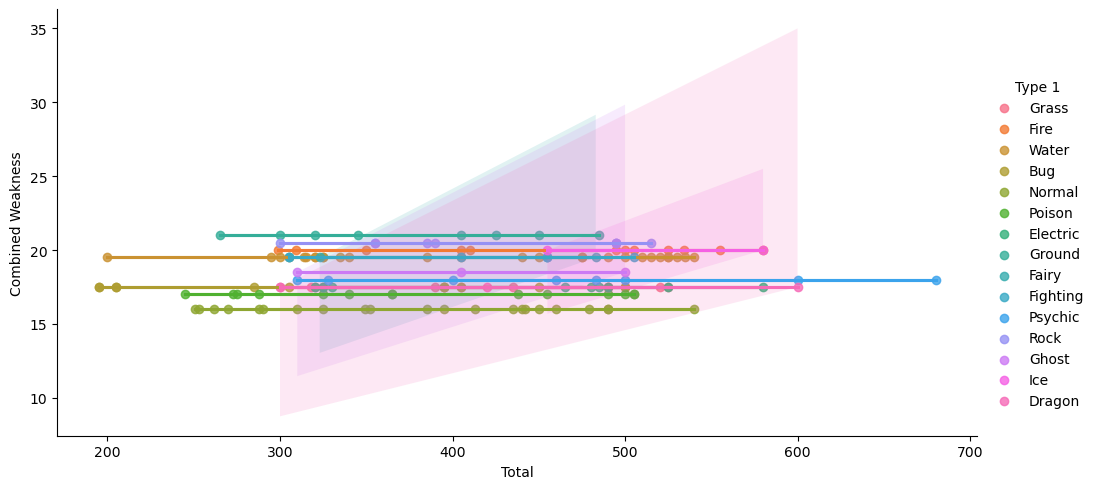

In [62]:
sns.lmplot(data = df_pokemon_merged, x = 'Total', y = 'Combined Weakness', hue = 'Type 1', aspect = 2)

#### Final Thoughts:

The dataset is quite simple. It gives you a good idea for which pokemon are, roughly, better than others. But the dataset does not seem to have enough data points to create any meaningful multivariable analysis. Even bringing in weakness data did not add much additional insight.

Finally, any open-ended questions of correlation became useless to pursue because too many varibles/constraints would not be accounted for.
    
    - i.e. Moves, Enemy weaknesses, and enemy team composition.
    
Would be better off running a simulation.